<a href="https://colab.research.google.com/github/SanyamWadhwa07/ML/blob/main/Svm_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from zipfile import ZipFile

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import glob
from sklearn import metrics
from skimage.feature import hog
from  matplotlib import image as mpimg
from sklearn.svm import SVC

image: (481, 500, 3)


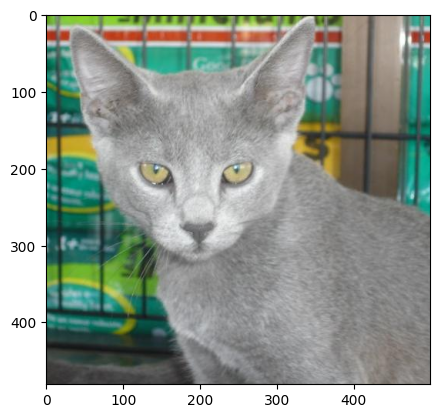

In [5]:
img = np.array(mpimg.imread('/content/drive/MyDrive/Cats and Dogs/train/Cats/1013.jpg'))
img.setflags(write=1)
print('image:',img.shape)
plt.imshow(img)
plt.show()

(128, 64, 3)


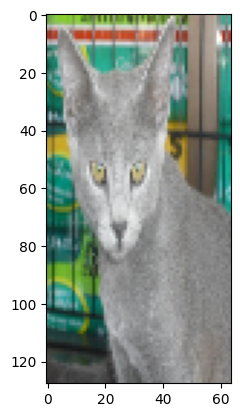

In [6]:
resized_img =cv2.resize(img,(64,128))
print(resized_img.shape)
plt.imshow(resized_img)
plt.show()

(6804,)
[0.04670926 0.025173   0.02451143 ... 0.0153655  0.06824019 0.09313578]
(128, 64)


<ipython-input-7-9b0c45902585>:1: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd,hog_img = hog(resized_img, visualize=True , multichannel=True)


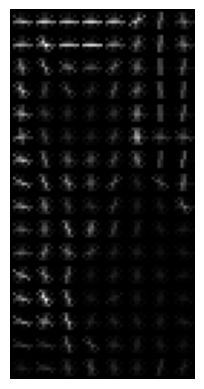

In [7]:
fd,hog_img = hog(resized_img, visualize=True , multichannel=True)
print(fd.shape)
print(fd)
print(hog_img.shape)
plt.axis("off")
plt.imshow(hog_img,cmap="gray")
plt.show()

In [9]:
data_dogs = []
data_cats = []


for i in glob.glob("/content/drive/MyDrive/Cats and Dogs/train/Dogs/*.jpg"):
    img = mpimg.imread(i)
    resized_img = cv2.resize(img, (64, 32))  # Resize image
    fd = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
             cells_per_block=(2, 2), visualize=False, multichannel=True)
    data_dogs.append(fd)


for i in glob.glob("/content/drive/MyDrive/Cats and Dogs/train/Cats/*.jpg"):
    img = mpimg.imread(i)
    resized_img = cv2.resize(img, (64, 32))  # Resize image
    fd = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
             cells_per_block=(2, 2), visualize=False, multichannel=True)
    data_cats.append(fd)


train_data = data_dogs + data_cats


print("Total training samples:", len(train_data))

<ipython-input-9-41b3ab307fd3>:8: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
<ipython-input-9-41b3ab307fd3>:16: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),


Total training samples: 500


In [10]:
train_label_list=[]
for i in range(len(train_data)):
  if i<250:
    train_label_list.append('dog')
  else:
    train_label_list.append('cat')

print(train_label_list)
print(len(train_label_list))

['dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog'

In [11]:
test_dogs = []
for i in glob.glob("/content/drive/MyDrive/Cats and Dogs/test/Dogs/*.jpg"):
    img = np.array(mpimg.imread(i))
    resized_img = cv2.resize(img, (64, 32))  # Corrected resize syntax
    fd = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
             cells_per_block=(2, 2), visualize=False, multichannel=True)
    test_dogs.append({'data': fd, 'label': 'dog'})

test_cats = []
for i in glob.glob("/content/drive/MyDrive/Cats and Dogs/train/Cats/*.jpg"):
    img = np.array(mpimg.imread(i))
    resized_img = cv2.resize(img, (64, 32))  # Corrected resize syntax
    fd = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
             cells_per_block=(2, 2), visualize=False, multichannel=True)
    test_cats.append({'data': fd, 'label': 'cat'})

test_data = test_dogs + test_cats
print(len(test_data))

<ipython-input-11-1f9b0325066b>:5: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
<ipython-input-11-1f9b0325066b>:13: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),


500


In [12]:
test_features = []
test_labels = []

for item in test_data:
    test_labels.append(item['label'])
    test_features.append(item['data'])

print(len(test_features))
print(test_labels)

500
['dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', '

In [13]:
x_axis_c_points = []
f1_svm = []
accuracies_svm = []
conf_matrix_svm = []

# Example C values
c_values = [0.1, 1, 10, 100, 1000]

for c in c_values:
    svm = SVC(C=c, kernel='linear')
    svm.fit(train_data, train_label_list)

    pred_labels_svm = svm.predict(test_features)

    acc_svm = svm.score(test_features, test_labels)
    accuracies_svm.append(acc_svm)

    conf_matrix = metrics.confusion_matrix(test_labels, pred_labels_svm)
    conf_matrix_svm.append(conf_matrix)

    f1 = metrics.f1_score(test_labels, pred_labels_svm, pos_label='dog')
    f1_svm.append(f1)

    x_axis_c_points.append(c)

In [14]:
for i, (c, f1, acc, conf_matrix) in enumerate(zip(x_axis_c_points, f1_svm, accuracies_svm, conf_matrix_svm)):
    print(f'FOR C = {c}, F1 SCORE = {f1:.2f}, ACCURACY = {acc:.2f}, CONFUSION MATRIX = \n{conf_matrix}\n')


FOR C = 0.1, F1 SCORE = 0.78, ACCURACY = 0.77, CONFUSION MATRIX = 
[[189  61]
 [ 52 198]]

FOR C = 1, F1 SCORE = 0.79, ACCURACY = 0.81, CONFUSION MATRIX = 
[[228  22]
 [ 72 178]]

FOR C = 10, F1 SCORE = 0.79, ACCURACY = 0.82, CONFUSION MATRIX = 
[[249   1]
 [ 87 163]]

FOR C = 100, F1 SCORE = 0.79, ACCURACY = 0.83, CONFUSION MATRIX = 
[[250   0]
 [ 86 164]]

FOR C = 1000, F1 SCORE = 0.79, ACCURACY = 0.83, CONFUSION MATRIX = 
[[250   0]
 [ 86 164]]

